In [ ]:
!pip install seaborn

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
wine_data = pd.read_csv("winequality-red.csv", sep=';')

# Display basic information
print(wine_data.info())
print(wine_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         

In [5]:
# Check for missing values
print(wine_data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


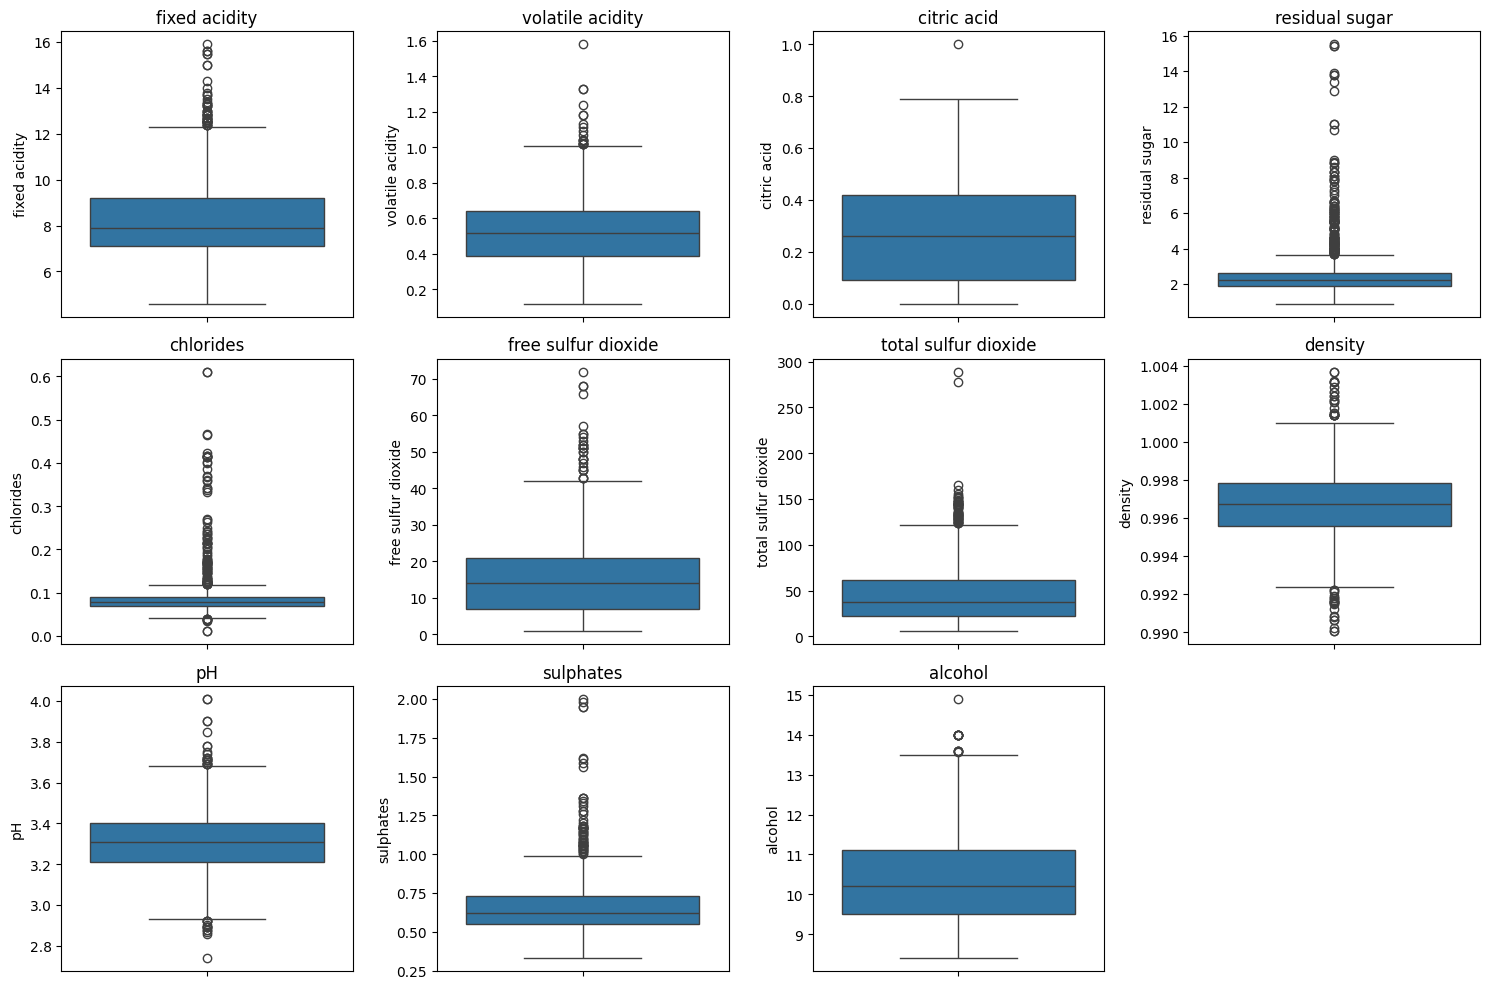

In [6]:
# Visualize outliers using boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(wine_data.columns[:-1]):  # Exclude quality column
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=wine_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Handle outliers using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper_bound, upper_bound, 
                         np.where(df[column] < lower_bound, lower_bound, df[column]))
    return df

for col in wine_data.columns[:-1]:
    wine_data = handle_outliers(wine_data, col)

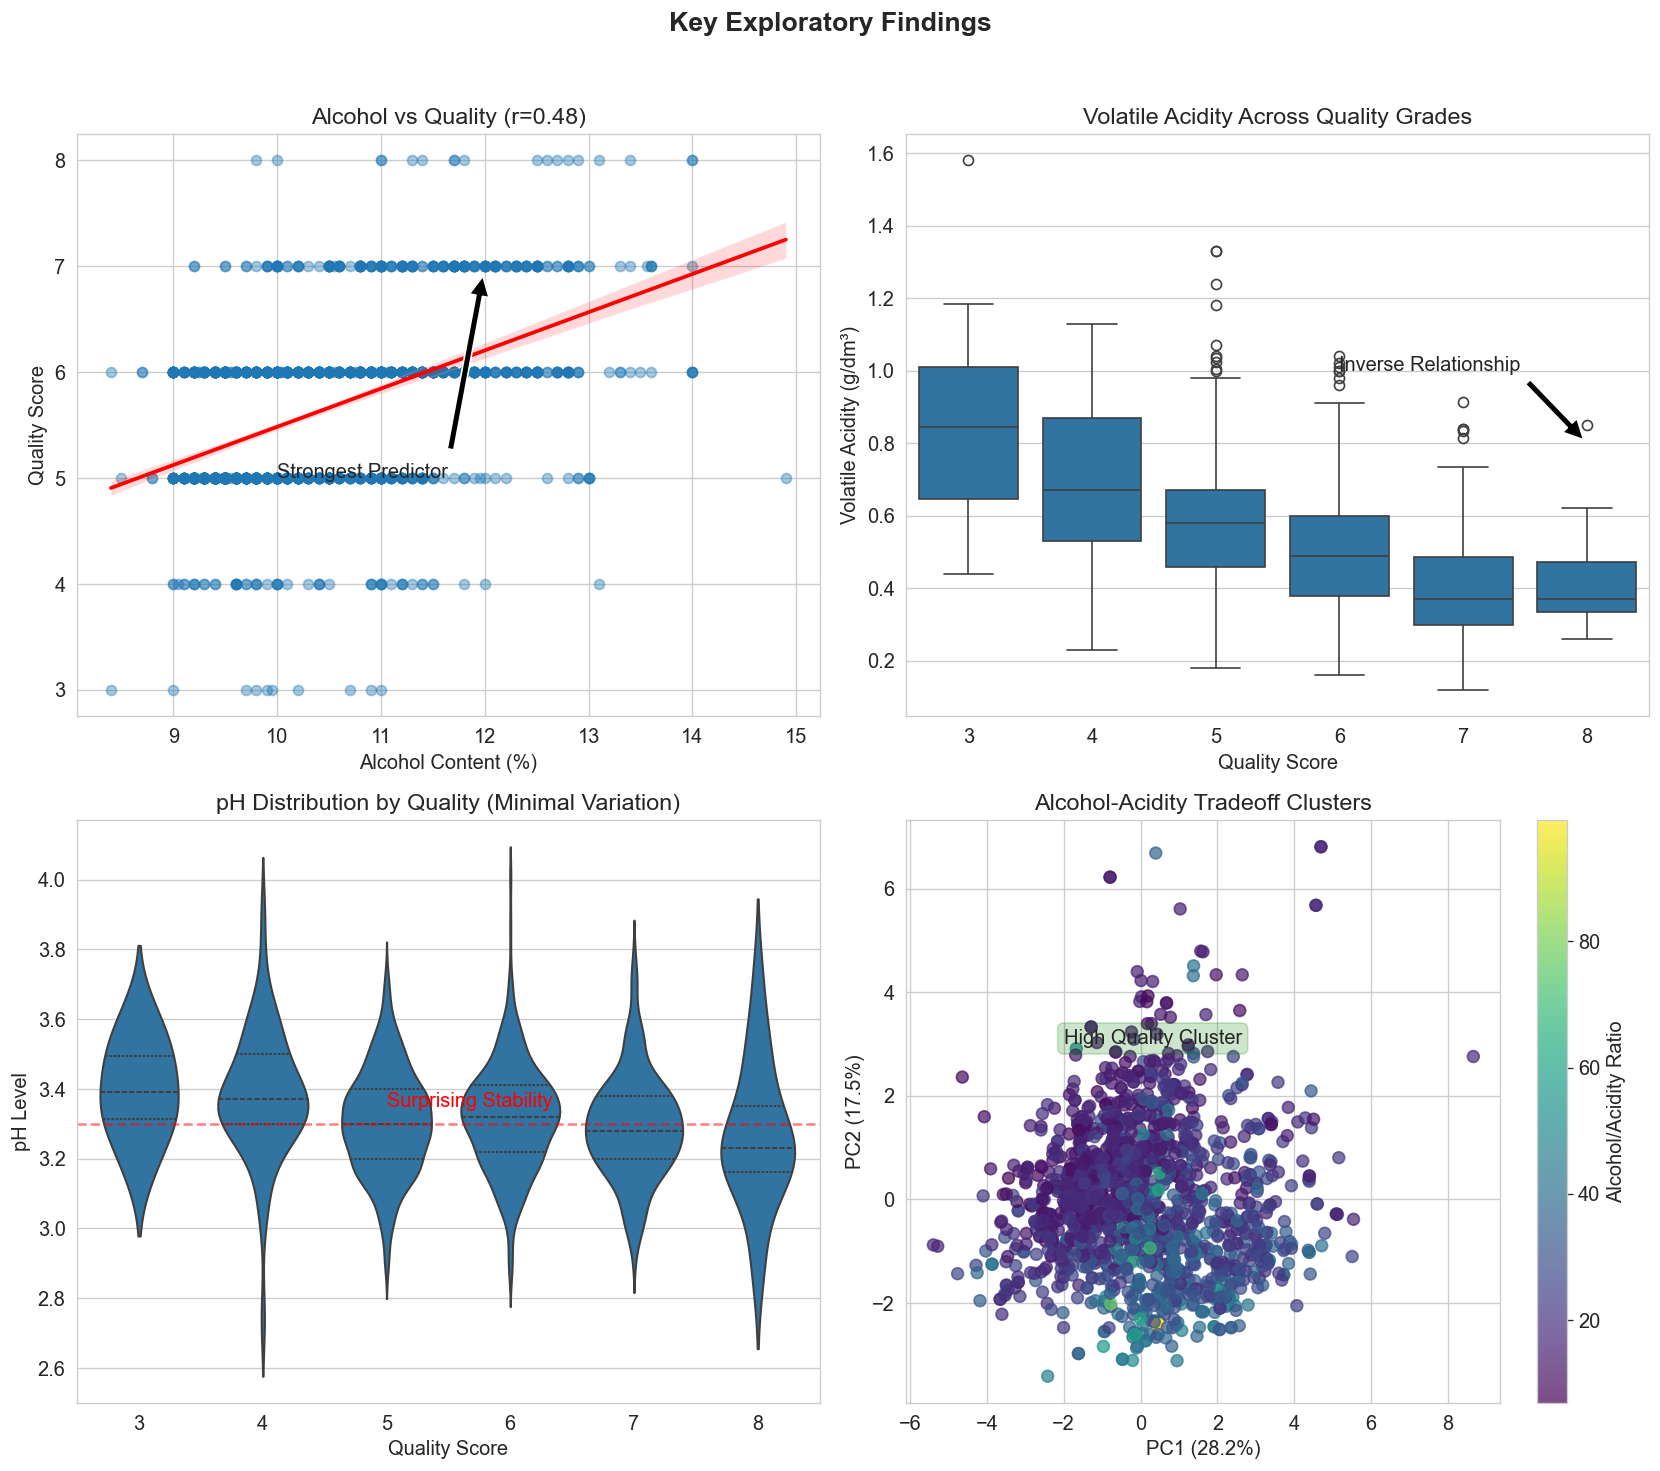

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set style 
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Key Exploratory Findings', y=1.02, fontsize=16, fontweight='bold')

# ----------------------------
# 1. Alcohol-Quality Correlation
# ----------------------------
ax1 = axes[0, 0]
sns.regplot(x='alcohol', y='quality', data=wine_data, 
            scatter_kws={'alpha':0.4}, line_kws={'color':'red'}, ax=ax1)
ax1.set_title('Alcohol vs Quality (r=0.48)', fontsize=14)
ax1.set_xlabel('Alcohol Content (%)', fontsize=12)
ax1.set_ylabel('Quality Score', fontsize=12)
ax1.annotate('Strongest Predictor', xy=(12, 7), xytext=(10, 5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)

# ----------------------------
# 2. Volatile Acidity Relationship
# ----------------------------
ax2 = axes[0, 1]
sns.boxplot(x='quality', y='volatile acidity', data=wine_data, ax=ax2)
ax2.set_title('Volatile Acidity Across Quality Grades', fontsize=14)
ax2.set_xlabel('Quality Score', fontsize=12)
ax2.set_ylabel('Volatile Acidity (g/dm³)', fontsize=12)
ax2.annotate('Inverse Relationship', xy=(5, 0.8), xytext=(3, 1.0),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)

# ----------------------------
# 3. pH Stability
# ----------------------------
ax3 = axes[1, 0]
sns.violinplot(x='quality', y='pH', data=wine_data, inner='quartile', ax=ax3)
ax3.set_title('pH Distribution by Quality (Minimal Variation)', fontsize=14)
ax3.set_xlabel('Quality Score', fontsize=12)
ax3.set_ylabel('pH Level', fontsize=12)
ax3.axhline(y=3.3, color='red', linestyle='--', alpha=0.5)
ax3.text(2, 3.35, 'Surprising Stability', color='red', fontsize=12)

# ----------------------------
# 4. Alcohol-Acidity Clusters
# ----------------------------
# Prepare data for clustering visualization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(wine_data.drop(['quality', 'quality_category'], axis=1))
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

ax4 = axes[1, 1]
scatter = ax4.scatter(principal_components[:, 0], principal_components[:, 1],
                     c=wine_data['alcohol']/wine_data['volatile acidity'],
                     cmap='viridis', alpha=0.7, s=50)
ax4.set_title('Alcohol-Acidity Tradeoff Clusters', fontsize=14)
ax4.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
ax4.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
cbar = plt.colorbar(scatter, ax=ax4)
cbar.set_label('Alcohol/Acidity Ratio', fontsize=12)
ax4.annotate('High Quality Cluster', xy=(-2, 3), fontsize=12,
             bbox=dict(boxstyle='round', alpha=0.2, color='green'))

plt.tight_layout()
plt.show()

In [10]:
# Create quality category for classification
wine_data['quality_category'] = np.where(wine_data['quality'] >= 6, 'good', 'bad')

# 1. CLASSIFICATION DATA PREP
# Features - exclude both quality and quality_category
X_class = wine_data.drop(['quality', 'quality_category'], axis=1)
# Target - only quality_category
y_class = wine_data['quality_category']

# 2. REGRESSION DATA PREP
# Features - exclude quality (but keep all physicochemical properties)
X_reg = wine_data.drop('quality', axis=1)
# Target - only quality (numerical)
y_reg = wine_data['quality']

In [11]:
# Scale features
scaler = StandardScaler()

# For classification - scale only numerical features
X_class_scaled = scaler.fit_transform(X_class)

# For regression - need to drop the categorical column before scaling
X_reg_numerical = X_reg.drop('quality_category', axis=1)
X_reg_scaled = scaler.fit_transform(X_reg_numerical)

# Train-test splits
# Classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class_scaled, y_class, test_size=0.2, random_state=42)

# Regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_class, y_train_class)

# Make predictions
y_pred_class = rf_classifier.predict(X_test_class)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test_class, y_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_class))
print("Accuracy:", accuracy_score(y_test_class, y_pred_class))

# Feature importance
feature_importances = pd.DataFrame(rf_classifier.feature_importances_,
                                   index = X_class.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("Feature Importances:\n", feature_importances)

Classification Report:
               precision    recall  f1-score   support

         bad       0.76      0.77      0.76       141
        good       0.82      0.80      0.81       179

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320

Confusion Matrix:
 [[109  32]
 [ 35 144]]
Accuracy: 0.790625
Feature Importances:
                       importance
alcohol                 0.193243
sulphates               0.128355
volatile acidity        0.106896
total sulfur dioxide    0.098018
density                 0.092228
chlorides               0.074088
pH                      0.066582
fixed acidity           0.065899
citric acid             0.064851
free sulfur dioxide     0.060440
residual sugar          0.049399


In [15]:

# Train model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)

# Evaluate
y_pred_reg = rf_regressor.predict(X_test_reg)
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))
print("R-squared:", r2_score(y_test_reg, y_pred_reg))

# Feature importance (now shapes will match)
feature_importances_reg = pd.DataFrame({
    'feature': X_reg.columns,
    'importance': rf_regressor.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importances:\n", feature_importances_reg)

Mean Squared Error: 0.2989228125
R-squared: 0.5425858724726909
Feature Importances:
                  feature  importance
10               alcohol    0.272395
9              sulphates    0.147147
1       volatile acidity    0.113344
6   total sulfur dioxide    0.079517
4              chlorides    0.068426
8                     pH    0.062045
7                density    0.053741
0          fixed acidity    0.053528
2            citric acid    0.052592
3         residual sugar    0.049214
5    free sulfur dioxide    0.048051


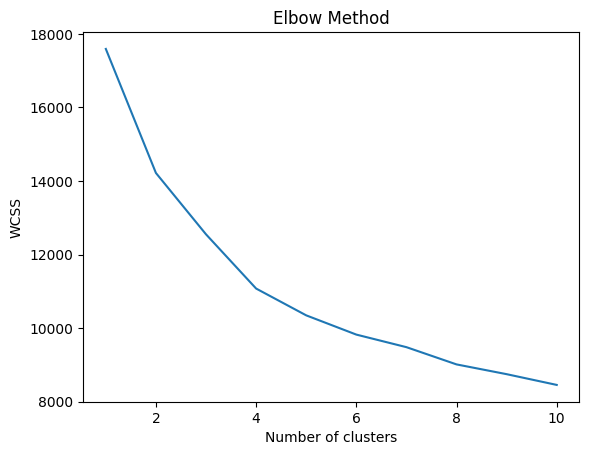

Silhouette Score: 0.17075400183525796


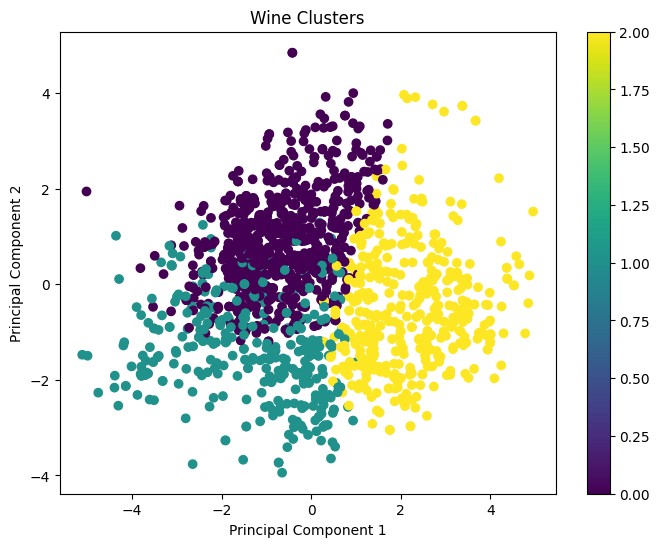

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_class_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow plot, we'll choose 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_class_scaled)

# Evaluate clustering
print("Silhouette Score:", silhouette_score(X_class_scaled, clusters))

# Add clusters to dataframe
wine_data['cluster'] = clusters

# Visualize clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_class_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.title('Wine Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

C:\Users\Ishini Kaushalya\AppData\Local\Temp\ipykernel_14248\251585418.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances_reg, palette='viridis')


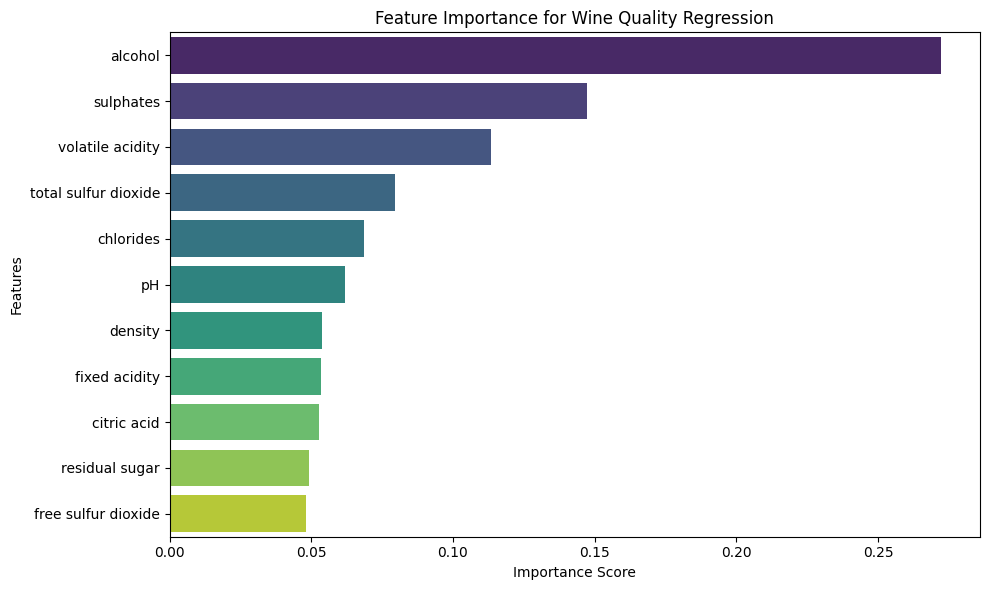

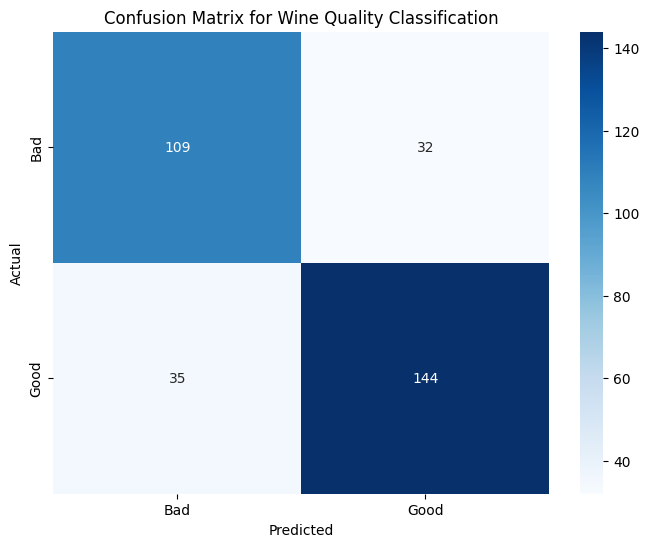

C:\Users\Ishini Kaushalya\AppData\Local\Temp\ipykernel_14248\251585418.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='rocket')


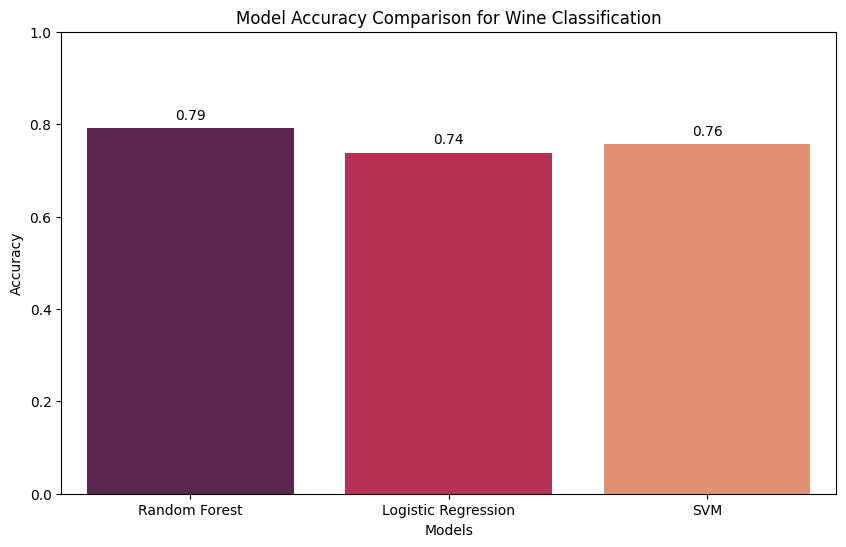

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Feature Importance Bar Chart (for Regression)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances_reg, palette='viridis')
plt.title('Feature Importance for Wine Quality Regression')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# 2. Confusion Matrix Heatmap (for Classification)
# First get predictions
y_pred_class = rf_classifier.predict(X_test_class)

# Create confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Bad', 'Good'], 
            yticklabels=['Bad', 'Good'])
plt.title('Confusion Matrix for Wine Quality Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 3. Accuracy Comparison Across Models
# Let's compare RandomForest with 2 other models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC()
}

# Train and evaluate each model
accuracies = {}
for name, model in models.items():
    model.fit(X_train_class, y_train_class)
    y_pred = model.predict(X_test_class)
    accuracies[name] = accuracy_score(y_test_class, y_pred)

# Create comparison bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='rocket')
plt.title('Model Accuracy Comparison for Wine Classification')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()